# Transfer learning Feature extraction

## 1. Build and fit a model using the 10% data of food 101 dataset.

Steps:
  * Load the data
  * Become one with data
  * Build the model from TensorFlow Hub
  * Fit and Evaluate the model

  > For this problem we'll be using [MobileNetV2](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4) architecture feature extraction model from TensorFlow Hub

### Load the data

In [ ]:
import zipfile

# download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-06 10:00:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  31.0MB/s    in 5.9s    

2023-07-06 10:00:44 (27.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



### Become one with data

In [ ]:
import os

# walk through 10 percent data directory and list number of files
for dirpath , dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [ ]:
# view random image function
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  """
  Returns the random image
  """
  # Setup thr target directory(view image for here)
  target_folder = target_dir + target_class

  # Get random image
  random_image = random.sample(os.listdir(target_folder),1)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  plt.show()
  print(f"Image shape: {img.shape}") # show the shape of image


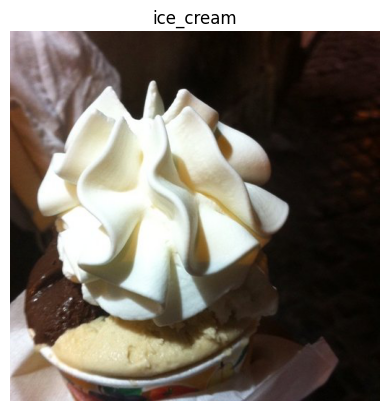

Image shape: (512, 512, 3)


In [ ]:
view_random_image(target_dir="10_food_classes_10_percent/train/", target_class="ice_cream")

### Creating data loaders(preparing the data)
We'll use the `ImageDataGenerator` class to load in our images in batches.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# our parameters
IMG_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


# instatiate the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size= IMG_SHAPE,
                                               batch_size= BATCH_SIZE,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= IMG_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode= "categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


We have 750 images in train_data and 2500 images in test_data

> Creating model using pretrained model from tensorflow hub

In [ ]:
# import depenencies

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
mobilenetv2 = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [ ]:
feature_extractor_layer = hub.KerasLayer(mobilenetv2,
                                        trainable=False,  #freeze the already learned patterns
                                        name="feature_extraction_layer",
                                        input_shape=IMG_SHAPE+(3,))


In [ ]:
# create a model
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(train_data_10_percent.num_classes, activation ="softmax", name="output_layer")
])

In [ ]:
model.compile(
    loss= "categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
# fit the model
history = model.fit(train_data_10_percent,
                            validation_data=(test_data),
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 151s 6s/step - loss: 1.9773 - accuracy: 0.3187 - val_loss: 1.3211 - val_accuracy: 0.5920
Epoch 2/5
24/24 [==============================] - 175s 8s/step - loss: 1.0579 - accuracy: 0.6893 - val_loss: 0.8945 - val_accuracy: 0.7424
Epoch 3/5
24/24 [==============================] - 173s 7s/step - loss: 0.7299 - accuracy: 0.8027 - val_loss: 0.7588 - val_accuracy: 0.7732
Epoch 4/5
24/24 [==============================] - 128s 5s/step - loss: 0.5810 - accuracy: 0.8387 - val_loss: 0.6872 - val_accuracy: 0.7888
Epoch 5/5
24/24 [==============================] - 141s 6s/step - loss: 0.4828 - accuracy: 0.8893 - val_loss: 0.6441 - val_accuracy: 0.8032


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#  Creating function to plot loss and accuracy curves

import matplotlib.pyplot as plt

def plot_curve(history):
    """
    Returns separate loss curves fro training and validation metrics.

    Args:
        history: TensorFlow History object.

    Return:
        Plots of training/validation loss and accuracy metrics.
    """
    loss = history.history["loss"]
    accuracy = history.history["accuracy"]
    val_loss = history.history["val_loss"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss)+1 )

    #plot the loss curve
    plt.plot(epochs, loss, 'b', label="Training loss")
    plt.plot(epochs, val_loss, 'r', label= "Validation loss")
    plt.title("Training and Validation loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()

    #plot the accuracy curve
    plt.figure()
    plt.plot(epochs, accuracy, 'b', label="Training accuracy")
    plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
    plt.title("Training and Validation accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()

    plt.show()
    plt.clf()

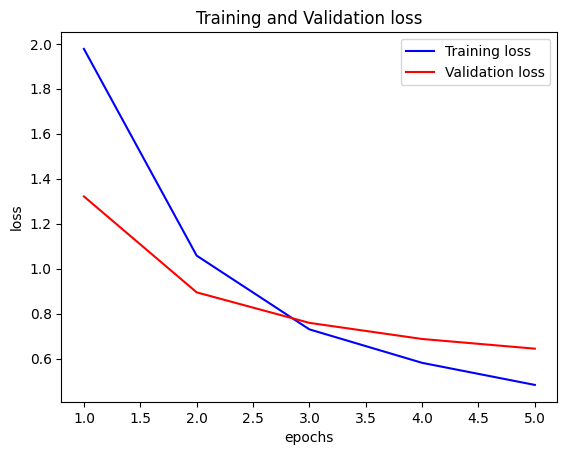

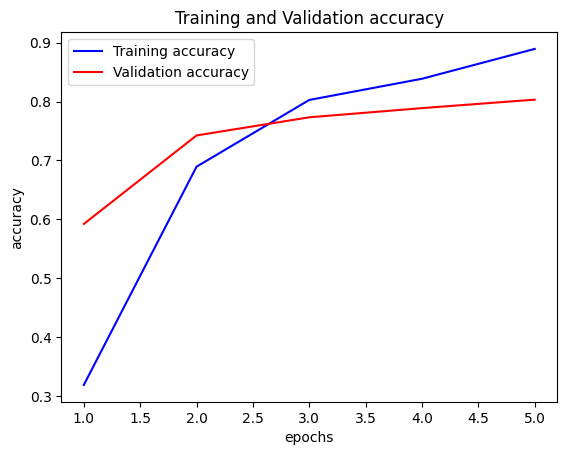

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_curve(history)

## 2. Name 3 models from Tensorflow Hub

1. Inception: Inception is a series of convolutional neural network (CNN) architectures that are known for their effectiveness in image classification. The Inception models use various techniques, such as inception modules with multiple filter sizes, to capture different levels of image features.

2. DenseNet: DenseNet is a densely connected convolutional network architecture that connects each layer to every other layer in a feed-forward fashion. It promotes feature reuse and helps alleviate the vanishing gradient problem. DenseNet models have shown strong performance on various image classification benchmarks.

3. VGG: VGG (Visual Geometry Group) is a classic convolutional neural network architecture known for its simplicity and effectiveness. It consists of several stacked convolutional layers with small filter sizes and max-pooling layers. VGG models have been widely used and serve as a baseline for many image classification tasks.

## 3. Build a model to classify images of two different things you've taken photos of.
* You can use any feature extraction layer from TensorFlow Hub you like for this.
* You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.

In [ ]:
# unzip the file
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/classify.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# creating a image datagen instant
from tensorflow.keras.preprocessing.image import ImageDataGenerator

directory = "classify/train/"

datagen = ImageDataGenerator(rescale=1/255.)

calssify_data = datagen.flow_from_directory(directory,
                                            target_size= IMG_SHAPE,
                                            class_mode = "binary")

Found 26 images belonging to 2 classes.


In [ ]:
# create a model
model_1 = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1, activation ="sigmoid", name="output_layer")
])


model_1.compile(
    loss= "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# fit the model
history = model_1.fit(calssify_data,
                            epochs=10 )

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.9316 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.8463 - accuracy: 0.4615
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.7746 - accuracy: 0.4231
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.7113 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.6531 - accuracy: 0.5769
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.5984 - accuracy: 0.6923
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5471 - accuracy: 0.7692
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.4995 - accuracy: 0.8846
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.4561 - accuracy: 0.8846
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.4171 - accuracy: 0.8846


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def plot_image(image_path):
    # Load the image
    image = Image.open(image_path)

    # Resize the image
    target_shape = (224, 224)
    resized_image = image.resize(target_shape)

    # Convert the image to a NumPy array
    image_array = np.array(resized_image)

    # Preprocess the image
    preprocessed_image = image_array / 255.0

    # Expand the dimensions of the image
    input_image = np.expand_dims(preprocessed_image, axis=0)

    # Make a prediction using the model
    prediction = model_1.predict(input_image)

    # Get the predicted label
    predicted_label = "lalit" if prediction > 0.5 else "kishan"

    # Plot the image and display the predicted label
    plt.imshow(resized_image)
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis("off")
    plt.show()
    return prediction

1/1 [==============================] - 0s 68ms/step


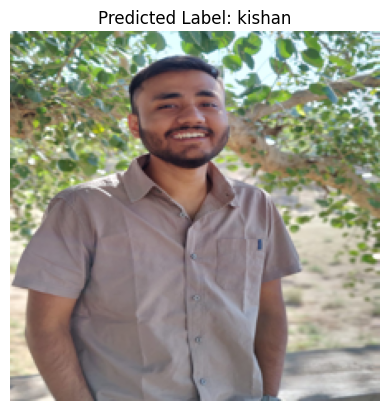

array([[0.41710502]], dtype=float32)

In [ ]:
plot_image("/content/WhatsApp Image 2023-07-06 at 18.20.57.jpg")

1/1 [==============================] - 0s 65ms/step


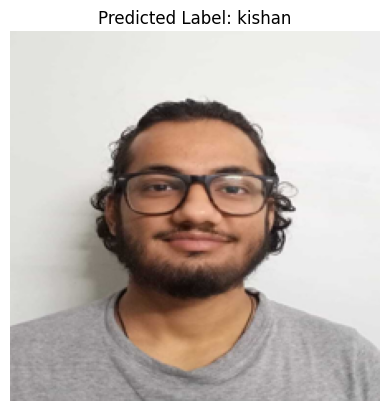

array([[0.39701435]], dtype=float32)

In [ ]:
plot_image("/content/1641310875282.jpg")

1/1 [==============================] - 0s 59ms/step


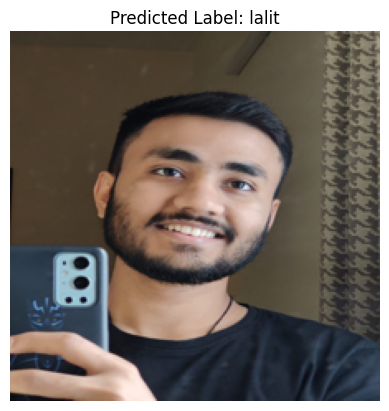

array([[0.5886889]], dtype=float32)

In [ ]:
plot_image("/content/WhatsApp Image 2023-07-06 at 18.20.5.jpg")

## 4. Currrent best model performing on ImageNet
> BASIC-L (Lion, fine-tuned)